<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT

###  This is a cars dataset having 156 observation and 16 different variables. You have to create a linear regression model using the provided predictor variables for the prediction of sales value of cars.

#### Note: Please run your code step by step as provided in the sheet or else you may face challenges with the code.

### Import the dataset.

In [4]:
import pandas as pd
car = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


### Check the shape of the dataset.

In [5]:
def lr():
    return car.shape 
lr()

(156, 16)

### Check the descriptive stats of the dataset.

In [6]:
def lr():
    return car.describe()
lr()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Q 1. Write a code to understand the total count and percentage of missing values.

In [7]:
def lr():
    total = car.isnull().sum().sort_values(ascending=False)
    percent = (car.isnull().sum()/car.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    miss = print(missing_data)
    return miss
lr()

                    Total   Percent
Sales_in_thousands      5  0.032051
Power_perf_factor       0  0.000000
Latest_Launch           0  0.000000
Fuel_efficiency         0  0.000000
Fuel_capacity           0  0.000000
Curb_weight             0  0.000000
Length                  0  0.000000
Width                   0  0.000000
Wheelbase               0  0.000000
Horsepower              0  0.000000
Engine_size             0  0.000000
Price_in_thousands      0  0.000000
Vehicle_type            0  0.000000
_year_resale_value      0  0.000000
Model                   0  0.000000
Manufacturer            0  0.000000


### Q 2. Impute the missing value using "median" groupby Manufacturer. 

In [8]:
def lr():
    car["Sales_in_thousands"].fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)
    return
lr()
print (car.isnull().sum())

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64


### Q 3. Create a dummy variable for "Vehicle_type"  and  drop the original variable.

In [9]:
car_dummy =pd.DataFrame()                                             # Creating an empty data frame
def lr(car):
    dummies = pd.get_dummies(car, columns=['Vehicle_type'], drop_first=True)
    return dummies
car_dummy = lr(car)
print(car_dummy)


    Manufacturer          Model  Sales_in_thousands  _year_resale_value  \
0          Acura        Integra              16.919           16.360000   
1          Acura             TL              39.384           19.875000   
2          Acura             CL              14.114           18.225000   
3          Acura             RL               8.588           29.725000   
4           Audi             A4              20.397           22.255000   
5           Audi             A6              18.780           23.555000   
6           Audi             A8               1.380           39.000000   
7            BMW           323i              19.747           18.072975   
8            BMW           328i               9.231           28.675000   
9            BMW           528i              17.527           36.125000   
10         Buick        Century              91.561           12.475000   
11         Buick          Regal              39.350           13.740000   
12         Buick    Park 

### Q 4. Drop the below mentioned variables which will not help in prediction of sales.
``` ['Manufacturer', 'Model', 'Latest_Launch'] ```

In [10]:
def lr(car_dummy):
    car_drop = car_dummy.drop(car_dummy[['Manufacturer', 'Model', 'Latest_Launch']], axis=1)
    return car_drop
car_dummy = lr(car_dummy)
print (car_dummy)

     Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
0                16.919           16.360000              21.500          1.8   
1                39.384           19.875000              28.400          3.2   
2                14.114           18.225000              29.000          3.2   
3                 8.588           29.725000              42.000          3.5   
4                20.397           22.255000              23.990          1.8   
5                18.780           23.555000              33.950          2.8   
6                 1.380           39.000000              62.000          4.2   
7                19.747           18.072975              26.990          2.5   
8                 9.231           28.675000              33.400          2.8   
9                17.527           36.125000              38.900          2.8   
10               91.561           12.475000              21.975          3.1   
11               39.350           13.740

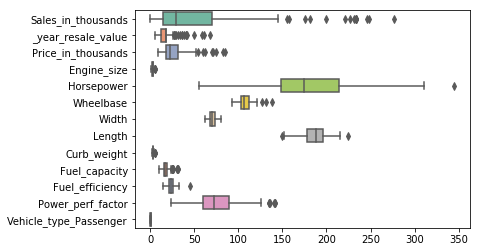

In [32]:
def lr():
    import seaborn as sns
    sns.boxplot(data=car_dummy, orient="h", palette="Set2")
    return None 
lr()

### Q 5. Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [33]:
def lr(car_dummy):
    import pandas as pd
    Q1 = car_dummy.quantile(0.05)
    Q3 = car_dummy.quantile(0.95)
    Q_diff = Q3 - Q1
    car_out = car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]
    print(car_dummy[((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)])
    return car_out
car_dummy = lr(car_dummy)
print (car_dummy)

     Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
125               1.866               67.55               74.97          3.4   

     Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
125         300       92.6   69.5   174.5        3.075           17.0   

     Fuel_efficiency  Power_perf_factor  Vehicle_type_Passenger  
125               23          135.91471                       1  
     Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
0                16.919           16.360000              21.500          1.8   
1                39.384           19.875000              28.400          3.2   
2                14.114           18.225000              29.000          3.2   
3                 8.588           29.725000              42.000          3.5   
4                20.397           22.255000              23.990          1.8   
5                18.780           23.555000              33.950          2.8   


### Q 6. Write code to standardize the variable for model building (return value will be numpy.ndarray).

In [13]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['Sales_in_thousands']], axis=1)
def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(car_modify)
    st = scaler.transform(car_modify)
    return st
std = lr(car_modify)
print(std[1])

[ 0.2147879   0.09116773  0.18859201  0.77851497  0.10306365 -0.22729613
  0.43698582  0.22647767 -0.18117654  0.25690808  0.64045582  0.58234907]


### Q 7. Write a code to create a DataFrame from the standardized value calculated above

### Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

```['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger'] ```

In [14]:
columns = ['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']
def lr(std):
    cars= pd.DataFrame(std)
    cars.columns = columns
    return cars
cars = lr(std)

### Q 8: Now since all variable may not be of use, please extract only the following variables for training. Preparing X (independent features) for the model building.

```['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']```

In [15]:
X = pd.DataFrame()
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                
def lr(cars):
    X = cars[feature_cols]
    return X
X = lr(cars)
print(X)

     Price_in_thousands  Engine_size  Wheelbase  Fuel_efficiency  \
0             -0.403867    -1.268771  -0.856756         0.971917   
1              0.091168     0.188592   0.103064         0.256908   
2              0.134214     0.188592  -0.063862         0.495244   
3              1.066888     0.500884   1.007242        -0.458101   
4             -0.225224    -1.268771  -0.662010         0.733581   
5              0.489348    -0.227798   0.186526        -0.458101   
6              2.501772     1.229566   0.784675        -0.696438   
7             -0.009992    -0.540090  -0.008220         0.495244   
8              0.449889    -0.227798  -0.008220         0.018572   
9              0.844481    -0.227798   0.562108         0.256908   
10            -0.369789     0.084495   0.228258         0.256908   
11            -0.131239     0.813176   0.228258        -0.219765   
12             0.346936     0.813176   0.895958         0.018572   
13             0.054219     0.813176   0.673391 

### Check for the type and shape of X.

In [16]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(154, 5)


### Q 9. Extract y (dependent variable) for model building.
```['Sales_in_thousands']```

In [17]:
y = pd.DataFrame()
def lr(car_dummy):
    y = car_dummy['Sales_in_thousands']
    return y
y = lr(car_dummy)
print(y.head())

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales_in_thousands, dtype: float64


### Check for the type and shape of y. 

In [18]:
def lr():
    print(type(y))
    print(y.shape)
lr()

<class 'pandas.core.series.Series'>
(154,)


<a id=section403></a>

### Q 10. Split the value of X and y into train and test datasets.

In [19]:
from sklearn.cross_validation import train_test_split
def lr():
    return train_test_split(X, y, test_size=0.30, random_state=1)
X_train, X_test, y_train, y_test = lr()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Check the shape of  X and y of train dataset.

In [20]:
def lr():
    print(X_train.shape)
    print(y_train.shape)
lr()

(107, 5)
(107,)


### Check the shape of X and y of test dataset.

In [21]:
def lr():
    print(X_test.shape)
    print(y_test.shape)
lr()

(47, 5)
(47,)


<a id=section404></a>

### Q 11. Instantiate Linear regression model using scikit-learn

In [22]:
from sklearn.linear_model import LinearRegression
def lr():
    linreg = LinearRegression()
    return linreg
linreg = lr()

### Q12. Fit the linear model on X_train and y_train.

In [23]:
def lr():
    linreg.fit(X_train, y_train)  
lr()

<a id=section405></a>

### Q 13. Interpret the Model Coefficients.

In [24]:
def lr():
    print('Intercept:',linreg.intercept_)                                            
    print('Coefficients:',linreg.coef_)
lr()

Intercept: 54.799449887479796
Coefficients: [-34.31886407  15.72311289  14.44766121   1.85806809  -0.48786904]


### Q.14 Zip the features to pair the feature names with the coefficients.

In [25]:
def lr():
    feature_cols.insert(0,'Intercept')
    coef = linreg.coef_.tolist()
    coef.insert(0, linreg.intercept_)
    eq1 = zip(feature_cols, coef)
    for c1,c2 in eq1:
        print(c1,c2)
lr()

Intercept 54.799449887479796
Price_in_thousands -34.31886407296333
Engine_size 15.723112890831631
Wheelbase 14.447661212265652
Fuel_efficiency 1.858068093280978
Vehicle_type_Passenger -0.4878690445625964


###  Q 15. Predict the train value using the built model.

In [26]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    pred.columns = ['Sales']
    head = pred.head()
    return head
lr()

,Sales
0,53.416651
1,68.933147
2,68.246112
3,34.094284
4,68.870887


### Q 16. Predict the test value using the built model.

In [27]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    pred_test.columns=['Sales']
    head = pred_test.head()
    return head
lr()

,Sales
0,53.079190
1,68.257593
2,27.775838
3,45.468436
4,66.711264


<a id=section406></a>

### Q 17 Evaluate the model using Mean Absolute Error metrics for both train and test.

In [28]:
from sklearn import metrics
def lr():
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 40.8809821019252
MAE for test set is 39.65688149451963


### Q 18 Evaluate the model using Mean Squared Error for both train and test.

In [29]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()

MSE for training set is 3458.107513092643
MSE for test set is 2877.9380668138374


### Q 19 Evaluate the model using Root Mean Squared Error for both train and test.

In [30]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 58.80567585780001
RMSE for test set is 53.646417092046676


### Q 20. Evaluate the model using R-square value for both train and test.

In [31]:
from sklearn.metrics import r2_score
def lr():
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set is {}'.format(R2_train))
    print('R2 for test set is {}'.format(R2_test))
lr()

R2 for training set is 0.20693342971854856
R2 for test set is 0.18716596176154165
